# Problem Statement: Analysing Sales Performance by Region in a Retail Company
● Import the "Retail_Sales_Data.csv" dataset. 

● Identify the relevant variables for aggregating sales data, such as region, sales amount, and product category.
    
● Group the sales data by region and calculate the total sales amount for each region.
                                                                     
● Create bar plots or pie charts to visualise the sales distribution by region. 
    
● Identify the top-performing regions based on the highest sales amount. 

● Group the sales data by region and product category to calculate the total sales amount for each combination.
    
● Create stacked bar plots or grouped bar plots to compare the sales amounts across different regions and product categories.

#  Import the "Retail_Sales_Data.csv" dataset. 

In [2]:
import pandas as pd
shopping = pd.read_csv('../../../Datasets/customer_shopping_data.csv')
shopping.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


#  Identify the relevant variables for aggregating sales data, such as region, sales amount, and product category.`

In [3]:
shopping.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

In [4]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


# Group the sales data by region and calculate the total sales amount for each region.

In [9]:
sales = shopping.groupby('shopping_mall').agg({'quantity':'sum'})
sales

,quantity
shopping_mall,
Cevahir AVM,14949
Emaar Square Mall,14501
Forum Istanbul,14852
Istinye Park,29465
Kanyon,59457
Mall of Istanbul,60114
Metrocity,44894
Metropol AVM,30530
Viaport Outlet,14716


# Create bar plots or pie charts to visualise the sales distribution by region. 

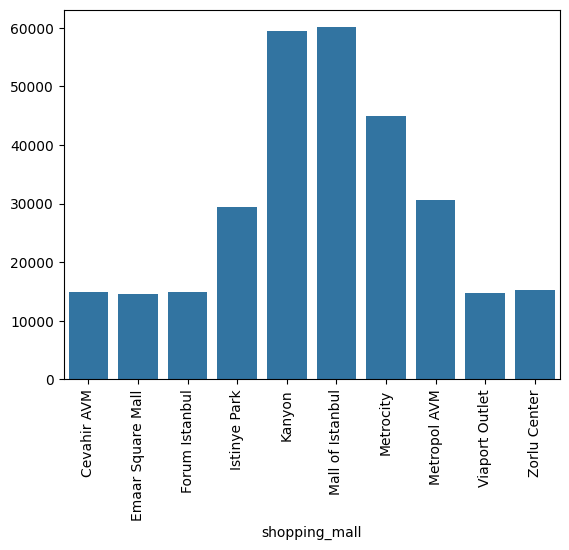

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Sales distribition by region')
sns.barplot(x=sales.index,y=sales.values.ravel())
plt.xticks(rotation=90);

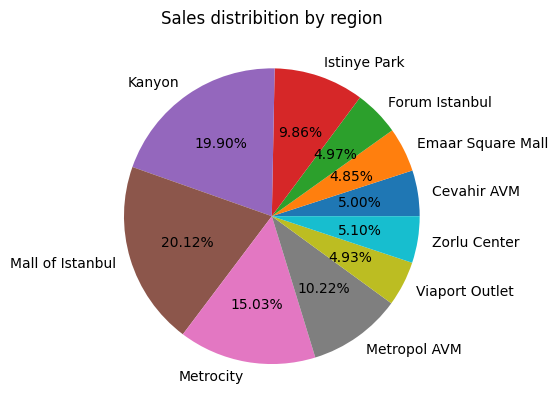

In [25]:
plt.title('Sales distribition by region')
plt.pie(x=sales.values.ravel(),labels=sales.index,autopct='%1.2f%%');

# Identify the top-performing regions based on the highest sales amount. 





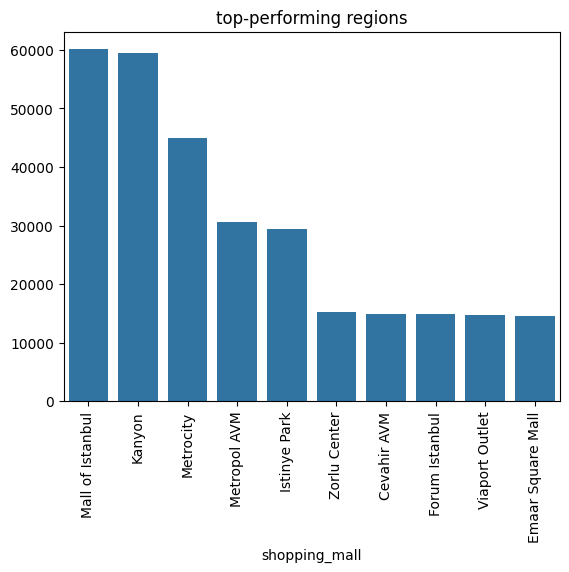

In [36]:
plt.title('top-performing regions')
sales_sorted = sales.sort_values(by='quantity',ascending=False)
sns.barplot(x=sales_sorted.index,y=sales_sorted.values.ravel())
plt.xticks(rotation=90);

# Group the sales data by region and product category to calculate the total sales amount for each combination.

In [41]:
sales_detail = shopping.groupby(['shopping_mall','category']).agg({'price':'sum'})
sales_detail

price
shopping_mall category                   
Cevahir AVM   Books              11998.80
              Clothing         1554414.40
              Cosmetics          88394.84
              Food & Beverage    11992.39
              Shoes             884050.41
...                                   ...
Zorlu Center  Food & Beverage    11589.68
              Shoes             953670.13
              Souvenir            8398.68
              Technology        803250.00
              Toys               54691.84

[80 rows x 1 columns]

# Create stacked bar plots or grouped bar plots to compare the sales amounts across different regions and product categories.

In [45]:
pivot_table = sales_detail.pivot_table(index='shopping_mall',columns='category',values='price')
pivot_table

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
shopping_mall,,,,,,,,
Cevahir AVM,11998.80,1554414.40,88394.84,11992.39,884050.41,8304.84,819000.0,55516.16
Emaar Square Mall,11059.50,1511803.04,92379.52,11030.07,871446.84,8515.98,834750.0,49423.36
Forum Istanbul,11453.40,1572119.12,95225.72,10836.56,875648.03,9090.75,706650.0,55050.24
Istinye Park,20725.20,3050313.20,178741.36,23419.94,1806511.70,18369.18,1509900.0,109096.96
Kanyon,44980.35,6155541.04,372242.30,45474.85,3640031.05,35483.25,3202500.0,214502.40
Mall of Istanbul,46949.85,6245565.04,373787.38,46431.94,3668239.04,34263.33,3220350.0,216151.04
Metrocity,34405.65,4719958.32,272422.00,35375.72,2610139.33,25770.81,2386650.0,165258.24
Metropol AVM,22240.20,3166444.16,185775.54,23984.78,1942750.29,18603.78,1465800.0,112394.24
Viaport Outlet,10908.00,1530708.08,92664.14,11432.78,882850.07,7636.23,823200.0,54620.16


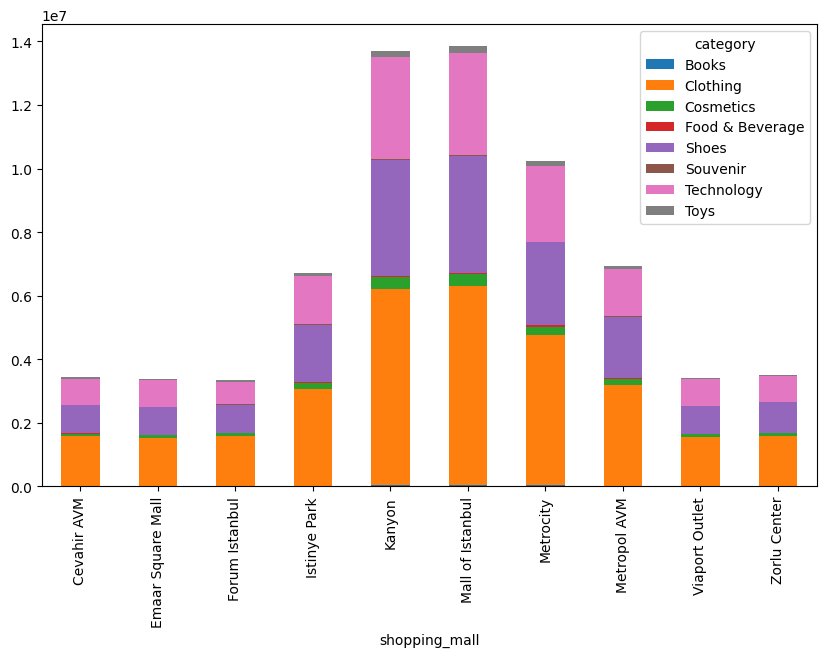

In [48]:
pivot_table.plot(kind='bar',stacked=True,figsize=(10,6));